In [3]:
#The plan for now is to predict world cases using Prophet
#predict the percentage of those cases represented by india and then multiply

#Importing Required Libraries

import numpy as np
import pandas as pd
from datetime import date

#Importing Visualization Libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from fbprophet.plot import plot_plotly, add_changepoints_to_plot


#Importing Libraries for Prediction
from fbprophet import Prophet

In [4]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
died_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-10-2020.csv')
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

India_state = pd.read_csv('/home/om/Documents/COVID-19/Datasets/India_statewise_data.csv')

In [5]:
drop_cols = ["Province/State", "Lat", "Long"]

confirmed_df.drop(drop_cols, inplace=True, axis="columns")
died_df.drop(drop_cols, inplace=True, axis="columns")
recovered_df.drop(drop_cols, inplace=True, axis="columns")

In [44]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()


In [88]:
def prophet_dataframe(df):
    df_changed = df.drop(['Country/Region'], axis='columns')
    df_changed = df_changed.sum().reset_index()
    df_changed = df_changed.rename(columns={'index':'ds', 0:'y'})
    
    return df_changed

In [89]:
def prophet_dataframe_by_country(df, country='India'):
    df_changed = df[df["Country/Region"] == 'India']
    df_changed = df_changed.drop(["Country/Region"], axis="columns").reset_index(drop=True)
    df_changed = df_changed.transpose().rename_axis('ds').reset_index()
    df_changed = df_changed.rename(columns={0:'y'})
    
    return df_changed

In [104]:
def prophet_predict(df, periods=30, already_changed=False):
    if not already_changed:
        df_changed = prophet_dataframe(df)
    else:
        df_changed = df
    model = Prophet(interval_width=0.95)
    model.fit(df_changed)
    future = model.make_future_dataframe(periods=7)
    
    forecast = model.predict(future)
    
    return model,forecast

In [93]:
model_conf,forecast_conf = prophet_predict(confirmed_df)
model,forecast = prophet_predict(recovered_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


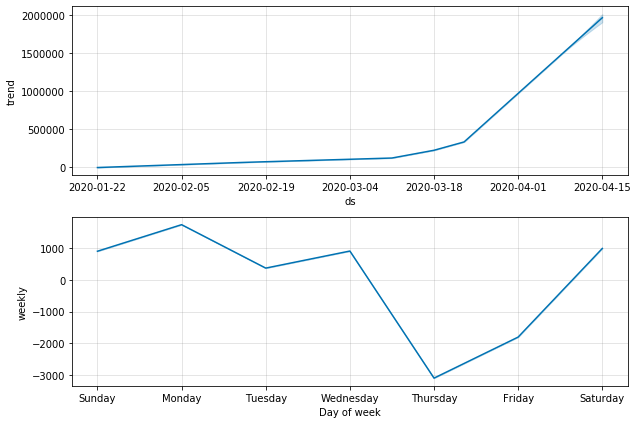

In [112]:
confirmed_forecast_plot = model_conf.plot(forecast_conf)
recovered_forecast_plot = model.plot(forecast)

In [ ]:
df_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths'].max().reset_index()
df_data["Last_Update"] = pd.to_datetime( df_data["Last_Update"]).dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(df_data, locations="Country_Region", locationmode='country names', 
                     color=np.power(df_data["Confirmed"],0.3)-2 , size= np.power(df_data["Confirmed"]+1,0.3)-1, hover_name="Country_Region",
                     hover_data=["Confirmed"],
                     range_color= [0, max(np.power(df_data["Confirmed"],0.3))], 
                     projection="natural earth", animation_frame="Last_Update", 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='COVID-19: Progression of spread'
                    )

fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [45]:
confirmed_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,Albania,0,0,0,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,Algeria,0,0,0,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,Andorra,0,0,0,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,Angola,0,0,0,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


In [62]:
current_confirmed = pd.DataFrame({'Country':confirmed_df.iloc[:,0], 'Current':confirmed_df.iloc[:,-1]}).sort_values('Current', ascending=False).reset_index(drop=True)

In [74]:
top_current_confirmed = current_confirmed.iloc[0:10:,]

In [75]:
fig = px.bar(top_current_confirmed, x="Current", y="Country", orientation='h')
fig.show()

In [ ]:
##############################################################################

In [70]:
confirmed_df_world = prophet_dataframe(confirmed_df)

In [73]:
confirmed_df_India = prophet_dataframe_by_country(confirmed_df, country='India')

In [115]:
India_by_percent = pd.DataFrame({'ds':confirmed_df_world['ds'], 'y':np.multiply(np.divide(confirmed_df_India['y'], confirmed_df_world['y']), 100)})

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


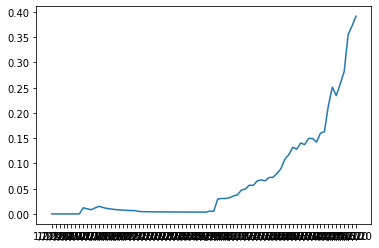

In [116]:
plt.plot(India_by_percent['ds'], India_by_percent['y'])

In [117]:
model,forecast = prophet_predict(India_by_percent, already_changed=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


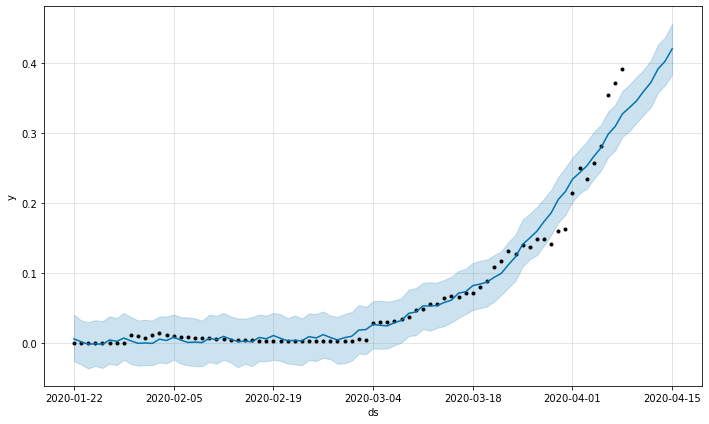

In [118]:
India_by_percent_plot = model.plot(forecast)

In [105]:
model,forecast = prophet_predict(confirmed_df_India, already_changed=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


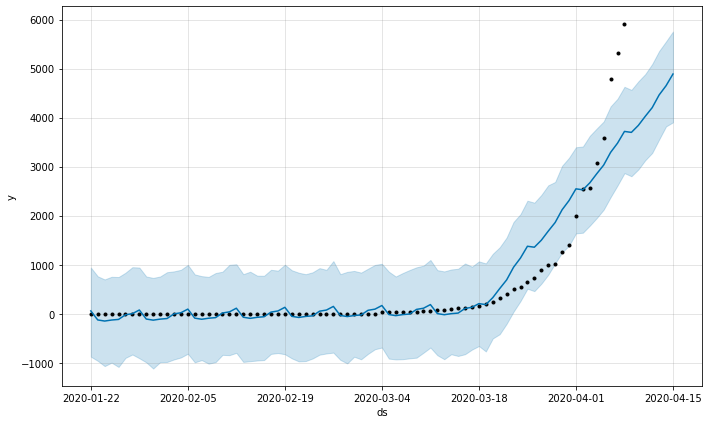

In [106]:
confirmed_forecast_India_plot = model.plot(forecast)

In [1]:
#################################################################################################

In [2]:
#################################################################################################

In [ ]:
#################################################################################################

In [38]:
covid_19_india = pd.read_csv('/home/om/Documents/COVID-19/Datasets/covid_19_india.csv')

covid_19_india['Confirmed'] = covid_19_india['ConfirmedIndianNational'] + covid_19_india['ConfirmedForeignNational']
covid_19_india.drop(columns=['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], inplace=True)


In [39]:
covid_19_india.head()

,Date,State / UT,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,10
1,31/01/20,Kerala,0,0,10
2,01/02/20,Kerala,0,0,20
3,02/02/20,Kerala,0,0,30
4,03/02/20,Kerala,0,0,30


In [35]:
covid_19_india = covid_19_india.groupby(['State / UT', 'Date'])['Cured', 'Deaths', 'Confirmed']

/home/om/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [37]:
covid_19_india.first()

Cured  Deaths Confirmed
State / UT                  Date                             
Andaman and Nicobar Islands 01/04/20      0       0        --
                            02/04/20      0       0        --
                            03/04/20      0       0        --
                            04/04/20      0       0        --
                            05/04/20      0       0        --
...                                     ...     ...       ...
West Bengal                 27/03/20      0       1       100
                            28/03/20      0       1       150
                            29/03/20      0       1        --
                            30/03/20      0       1        --
                            31/03/20      0       2        --

[863 rows x 3 columns]

In [ ]:
###############################################################################################################

In [ ]:
###############################################################################################################

In [120]:
India_state = India_state.sort_values('Confirmed', ascending=False).reset_index(drop=True)

In [121]:
India_state.style.background_gradient(cmap="Reds")

,State / UT,Confirmed,Recovered,Death
0,Maharashtra,1574,188,110
1,Tamil Nadu,911,44,8
2,Delhi,903,25,14
3,Rajasthan,553,21,3
4,Telengana,504,43,9
5,Madhya Pradesh,443,0,33
6,Uttar Pradesh,433,32,4
7,Andhra Pradesh,381,11,6
8,Kerala,364,123,2
9,Gujarat,308,31,19


In [137]:
census_data = pd.read_csv('/home/om/Documents/COVID-19/Datasets/population_india_census2011.csv')

In [143]:
census_data.head()

,State / UT,Population,Rural population,Urban population,Area,Density(/sq km),Gender Ratio
0,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)",828.0,912
1,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365.0,929
2,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)",1102.0,918
3,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)",1029.0,953
4,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236.0,931


In [138]:
India_cov_pop = India_state.groupby('State / UT')['Confirmed', 'Recovered', 'Death'].max().reset_index()

/home/om/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [172]:
India_cov_pop = India_cov_pop.merge(census_data[["State / UT", "Population","Urban population", "Density(/sq km)", "Gender Ratio"]], on = "State / UT")

In [173]:
fig = px.scatter(India_cov_pop, x='Population', y='Confirmed', hover_data=['State / UT'] )
fig.show()

In [174]:
fig = px.scatter(India_cov_pop, x='Density(/sq km)', y='Confirmed', hover_data=['State / UT'] )
fig.show()

In [176]:
fig = px.scatter(India_cov_pop, x='Urban population_x', y='Confirmed', hover_data=['State / UT'] )
fig.show()

In [178]:
India_cov_pop['Urbanization'] = India_cov_pop['Urban population_x'] / India_cov_pop['Population_x']

fig = px.scatter(India_cov_pop, x='Urbanization', y='Confirmed', hover_data=['State / UT'] )
fig.show()

In [179]:
Individual_details = pd.read_csv('/home/om/Documents/COVID-19/Datasets/IndividualDetails.csv')

In [180]:
gender = Individual_details['gender'].dropna()

In [181]:
gender.head().reset_index(drop=True)

0    F
1    M
2    M
3    M
4    F
Name: gender, dtype: object

In [182]:
gender_male = (gender == 'M').sum()
gender_female = (gender == 'F').sum()

In [183]:
overall_gender_ratio = gender_male / gender_female

In [184]:
overall_gender_ratio

2.6909492273730686

In [185]:
fig = px.scatter(India_cov_pop, x='Gender Ratio', y='Confirmed', hover_data=['State / UT'] )
fig.show()

In [ ]:
##################################################################################################################

In [ ]:
##################################################################################################################

In [103]:
Statewise_testing = pd.read_csv('/home/om/Documents/COVID-19/Datasets/StatewiseTestingDetails.csv')

In [104]:
Statewise_testing.drop(columns=['Negative', 'Positive'], inplace=True)

In [106]:
Statewise_testing_latest = Statewise_testing.pivot_table('TotalSamples', ['Date'],'State').iloc[-2]

In [127]:
for state in list(India_state['State / UT']):
    if state not in Statewise_testing_latest.index:
        Statewise_testing_latest = Statewise_testing_latest.append(pd.Series({state:0}))

In [132]:
Statewise_testing_latest = Statewise_testing_latest.sort_index()

In [138]:
pd.concat([India_state.sort_values('State / UT').reset_index(drop=True), Statewise_testing_latest.to_frame()], axis=1)


,State / UT,Confirmed,Recovered,Death,0
0,Andaman and Nicobar Islands,11.0,0.0,0.0,NaN
1,Andhra Pradesh,381.0,11.0,6.0,NaN
2,Arunachal Pradesh,1.0,0.0,0.0,NaN
3,Assam,29.0,0.0,1.0,NaN
4,Bihar,60.0,0.0,1.0,NaN
...,...,...,...,...,...
Telengana,NaN,NaN,NaN,NaN,0.0
Tripura,NaN,NaN,NaN,NaN,0.0
Uttar Pradesh,NaN,NaN,NaN,NaN,0.0
Uttarakhand,NaN,NaN,NaN,NaN,0.0
